In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.add("PyPlot"); Pkg.add("ForwardDiff"); Pkg.instantiate()

  Activating project at `/workspaces/lecture-notebooks/Lecture 3`
   Resolving package versions...
  No Changes to `/workspaces/lecture-notebooks/Lecture 3/Project.toml`
  No Changes to `/workspaces/lecture-notebooks/Lecture 3/Manifest.toml`
   Resolving package versions...
  No Changes to `/workspaces/lecture-notebooks/Lecture 3/Project.toml`
  No Changes to `/workspaces/lecture-notebooks/Lecture 3/Manifest.toml`


In [2]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [3]:
function pendulum_dynamics(x)
    l = 1.0
    g = 9.81
    
    θ = x[1]
    θ̇ = x[2]
    
    θ̈ = -(g/l)*sin(θ)
    
    return [θ̇; θ̈]
end

pendulum_dynamics (generic function with 1 method)

In [4]:
function backward_euler_step_fixed_point(fun, x0, h)
    xn = x0
    e = [norm(x0 + h.*fun(xn) - xn)]
    while e[end] > 1e-8
        xn = x0 + h.*fun(xn)
        e = [e; norm(x0 + h.*fun(xn) - xn)]
    end
    
    return xn, e
end

backward_euler_step_fixed_point (generic function with 1 method)

In [5]:
function backward_euler_step_newton(fun, x0, h)
    xn = x0
    r = x0 + h.*fun(xn) - xn
    e = [norm(r)]
    while e[end] > 1e-8
        ∂r = ForwardDiff.jacobian(x -> x0 + h.*fun(x) - x, xn)
        xn = xn - ∂r\r
        r = x0 + h.*fun(xn) - xn
        e = [e; norm(r)]
    end

    return xn, e
end

backward_euler_step_newton (generic function with 1 method)

In [6]:
function backward_euler_fixed_point(fun, x0, Tf, h)
    t = Array(range(0,Tf,step=h))
    
    x_hist = zeros(length(x0),length(t))
    x_hist[:,1] .= x0
    
    for k = 1:(length(t)-1)
        x_hist[:,k+1], e = backward_euler_step_fixed_point(fun, x_hist[:,k], h)
    end
    
    return x_hist, t
end

backward_euler_fixed_point (generic function with 1 method)

In [7]:
function backward_euler_newton(fun, x0, Tf, h)
    t = Array(range(0,Tf,step=h))
    
    x_hist = zeros(length(x0),length(t))
    x_hist[:,1] .= x0
    
    for k = 1:(length(t)-1)
        x_hist[:,k+1], e = backward_euler_step_newton(fun, x_hist[:,k], h)
    end
    
    return x_hist, t
end

backward_euler_newton (generic function with 1 method)

  0.003173 seconds (41.49 k allocations: 3.006 MiB)
  0.005956 seconds (37.01 k allocations: 2.327 MiB)


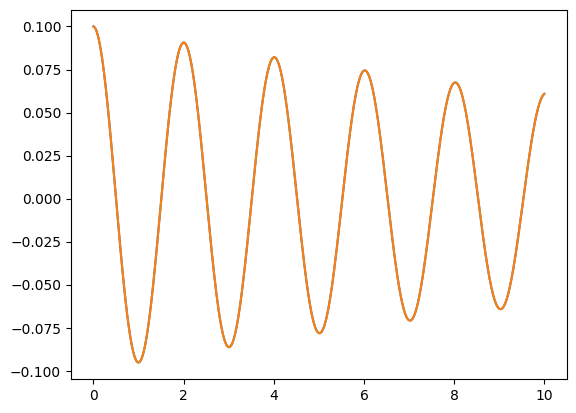

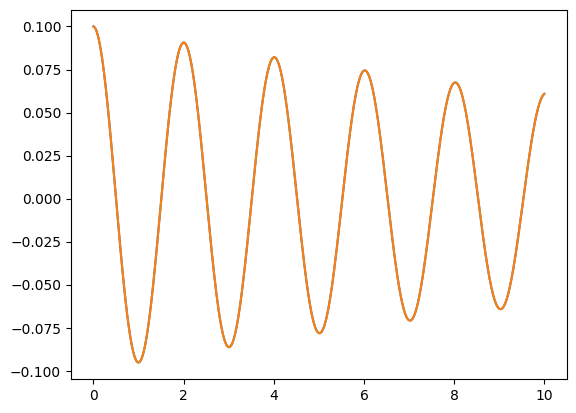

In [11]:
x0 = [.1; 0]
# 计时
@time x_hist1, t_hist1 = backward_euler_fixed_point(pendulum_dynamics, x0, 10, 0.01)
@time x_hist2, t_hist2 = backward_euler_newton(pendulum_dynamics, x0, 10, 0.01)
plot(t_hist1, x_hist1[1,:])
plot(t_hist2, x_hist2[1,:])
display(gcf())

In [12]:
max(abs.(x_hist1-x_hist2)...)

7.3007510554383426e-6

In [ ]:
xn, e1 = backward_euler_step_fixed_point(pendulum_dynamics, x0, 0.1)
e1

In [ ]:
xn, e2 = backward_euler_step_newton(pendulum_dynamics, x0, 0.1)
e2

In [ ]:
clf()
semilogy(e1)
semilogy(e2)
display(gcf())